In [22]:
#importing request to install library
import requests

In [23]:
!apt install tesseract-ocr libtesseract-dev libmagickwand-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2.1build1).
tesseract-ocr is already the newest version (4.1.1-2.1build1).
libmagickwand-dev is already the newest version (8:6.9.11.60+dfsg-1.3ubuntu0.22.04.5).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


In [24]:
!pip install pytesseract wand opencv-python

In [25]:
#import necessary library
from PIL import Image
import pytesseract
import cv2
import numpy as np
from pytesseract import Output
import re

In [26]:
#reading the image from the url
image = Image.open(requests.get("https://i.pinimg.com/736x/68/4d/68/684d681f559084fb0fc82712a1797707.jpg",stream=True).raw)
image = image.resize((400,200))
image.save("custom_image.png")

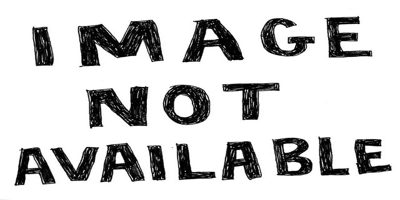

In [27]:
image

In [28]:
#extracting text from image
custom_config = r"-l eng --oem 3 --psm 6"
extracted_text = pytesseract.image_to_string(image,config=custom_config)
print(extracted_text)

IMAGE
NOT
AVAILABLE



In [29]:
#extracting text from image and removing irrelevant symbols
try:
  extracted_text = pytesseract.image_to_string(image,lang="eng")
  character_to_remove="!()@—*“>+-/,'|£#%$&^_~"
  new_string=extracted_text
  for char in character_to_remove:
    new_string=new_string.replace(char,"")
  print(new_string)
except IOError as e:
  print("Error (%s)." %e)

IMAGE
NOT
AVAILABLE



In [30]:
#performing opencv operations to extract text from any images
image = cv2.imread("/content/custom_image.png")

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[240, 240, 240],
        [240, 240, 240],
        [240, 240, 240],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
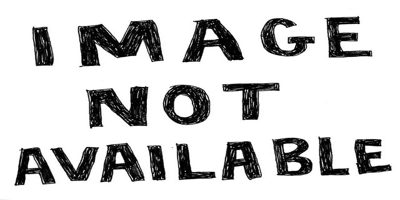

In [31]:
image

In [32]:
#converting it from the colour to grayscale mode
def get_grayscale(image):
  return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray=get_grayscale(image)

print(gray)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [240 240 240 ... 255 255 255]]


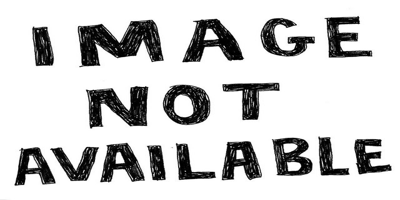

In [33]:
Image.fromarray(gray)

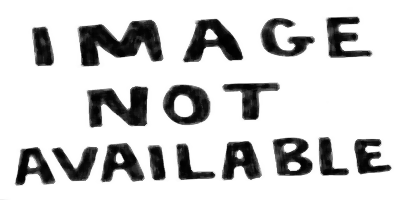

In [34]:
#noise removal
def remove_noise(image):
  return cv2.medianBlur(image,5)
noise = remove_noise(gray)
Image.fromarray(noise)

In [35]:
#threshold transformation
def threshold_image(image):
  return cv2.threshold(image,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thresh = threshold_image(gray)

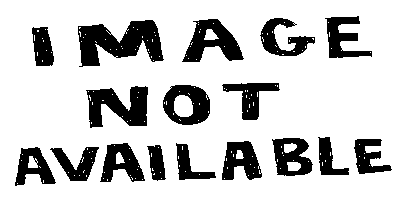

In [36]:
Image.fromarray(thresh)

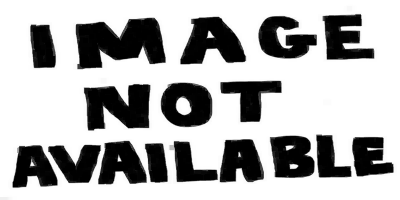

In [37]:
#erosion
def erode_image(image):
  kernal = np.ones((5,5),np.uint8)
  return cv2.erode(image,kernal,iterations=1)
erode=erode_image(gray)
Image.fromarray(erode)

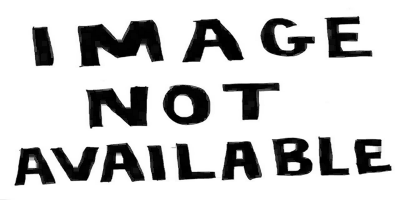

In [38]:
#morphology
def morphing_image(image):
  kernal = np.ones((5,5),np.uint8)
  return cv2.morphologyEx(image,cv2.MORPH_OPEN,kernal)
morphImage=morphing_image(gray)
Image.fromarray(morphImage)

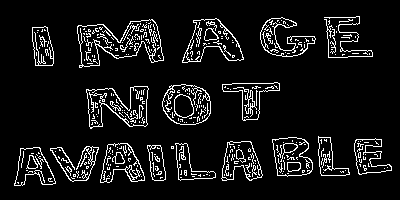

In [39]:
#canny edge detection
def canny_edge_detection(image):
  return cv2.Canny(image,100,200)
canny = canny_edge_detection(gray)
Image.fromarray(canny)

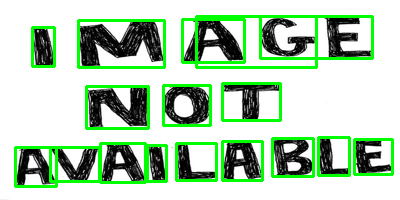

In [40]:
#drawing rectangle around the image
img = cv2.imread("/content/custom_image.png")
h,w,c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
  b = b.split(" ")
  img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
Image.fromarray(img)

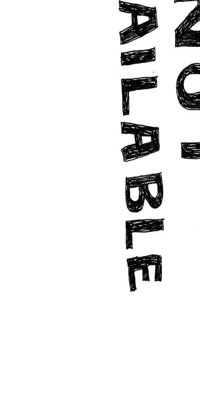

In [41]:
#skew-corrections
def skew_correction(image):
  coords = np.column_stack(np.where(image>0))
  angle = cv2.minAreaRect(coords)[-1]
  if angle < -45:
    angle = -(90+angle)
  else:
    angle=-angle
    (h,w)=image.shape[:2]
    center=(w//2,h//2)
    M=cv2.getRotationMatrix2D(center,angle,1.0)
    rotated = cv2.warpAffine(image,M,(h,w),flags=cv2.INTER_CUBIC,borderMode=cv2.BORDER_REPLICATE)
    return rotated
rotated = skew_correction(gray)
Image.fromarray(rotated)

In [42]:
#template match
def template_match(image,template):
  return cv2.matchTemplate(image,template,cv2.TM_CCOEFF_NORMED)
match1 = template_match(gray,gray)
match1

array([[1.]], dtype=float32)